In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, concatenate, BatchNormalization, \
    Activation, AveragePooling2D
from tensorflow.keras import callbacks
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Loading training data
data = np.load("hexapoda.npz")
x_train = data["x_OH_train"]
x_valid = data["x_OH_test"]
y_train = data["y_train"]
y_valid = data["y_test"]
x_test = data["x_OH_valid"]
y_test = data["y_valid"]

In [290]:
# ~71% accuracy
model = models.Sequential()
model.add(layers.InputLayer((31,4)))
model.add(layers.Conv1D(72,8, activation="relu"))
model.add(layers.Dropout(0.55))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(36,4, activation="relu"))
model.add(layers.Dropout(0.50))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(34,2, activation="relu"))
model.add(layers.Dropout(0.45))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_414 (Conv1D)          (None, 24, 72)            2376      
_________________________________________________________________
dropout_675 (Dropout)        (None, 24, 72)            0         
_________________________________________________________________
max_pooling1d_409 (MaxPoolin (None, 12, 72)            0         
_________________________________________________________________
conv1d_415 (Conv1D)          (None, 9, 36)             10404     
_________________________________________________________________
dropout_676 (Dropout)        (None, 9, 36)             0         
_________________________________________________________________
max_pooling1d_410 (MaxPoolin (None, 4, 36)             0         
_________________________________________________________________
conv1d_416 (Conv1D)          (None, 3, 34)          

Epoch 1/30
482/482 [==============================] - 4s 6ms/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4804
Epoch 2/30
482/482 [==============================] - 2s 3ms/step - loss: 0.6936 - accuracy: 0.5014 - val_loss: 0.6936 - val_accuracy: 0.4804
Epoch 3/30
482/482 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5166 - val_loss: 0.6933 - val_accuracy: 0.4784
Epoch 4/30
482/482 [==============================] - 2s 4ms/step - loss: 0.6895 - accuracy: 0.5352 - val_loss: 0.6900 - val_accuracy: 0.5294
Epoch 5/30
482/482 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.5603 - val_loss: 0.6887 - val_accuracy: 0.5490
Epoch 6/30
482/482 [==============================] - 2s 3ms/step - loss: 0.6820 - accuracy: 0.5760 - val_loss: 0.6836 - val_accuracy: 0.5706
Epoch 7/30
482/482 [==============================] - 4s 7ms/step - loss: 0.6768 - accuracy: 0.5857 - val_loss: 0.6808 - val_accuracy: 0.6020
Epoch 

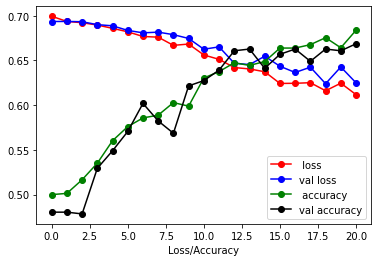

0.6686


In [291]:
# Compiling and running the model
rms = keras.optimizers.RMSprop(
    learning_rate=0.00065,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
adam = keras.optimizers.Adam(learning_rate=0.00065,
    beta_1=0.99,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")

model.compile(loss='binary_crossentropy', 
               optimizer=adam, 
               metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min')

history = model.fit(x_train, y_train,
                     validation_data=(x_valid, y_valid), 
                     batch_size=12, epochs=30, verbose=1, callbacks=[earlystopping])

plt.plot(history.history["loss"],'-or', label=" loss")
plt.plot(history.history["val_loss"],'-ob',label ="val loss")
plt.plot(history.history["accuracy"],'-og', label=" accuracy")
plt.plot(history.history["val_accuracy"],'-ok',label ="val accuracy")
plt.xlabel("Epoch")
plt.xlabel("Loss/Accuracy")
plt.legend()
plt.show()

print(round(history.history["val_accuracy"][-1],4))

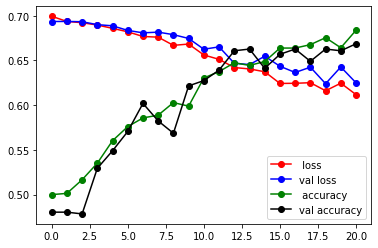

In [294]:
plt.plot(history.history["loss"],'-or', label=" loss")
plt.plot(history.history["val_loss"],'-ob',label ="val loss")
plt.plot(history.history["accuracy"],'-og', label=" accuracy")
plt.plot(history.history["val_accuracy"],'-ok',label ="val accuracy")
plt.legend()
plt.savefig("model_performance_CNN.png", transparent=True, format="png",dpi=300)
plt.show()


In [293]:
# Model performance on test data
model.evaluate(x_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6896


[0.6166311502456665, 0.689587414264679]